In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from glob import glob
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary


from torch import nn
from PIL import Image
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
%matplotlib inline

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 9.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 86.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 70.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 876.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 28.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Explore Data And EDA

In [2]:
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
from PIL import Image

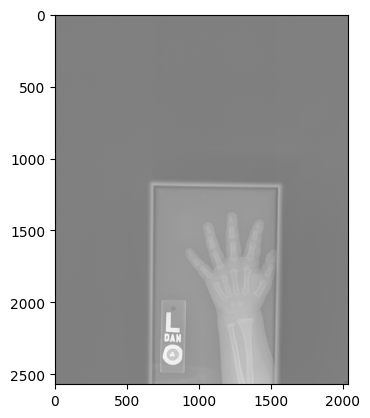

In [89]:
d = cv.imread("/kaggle/input/rsna-bone-age/boneage-test-dataset/boneage-test-dataset/4483.png",0)
plt.imshow(d,cmap ="gray")

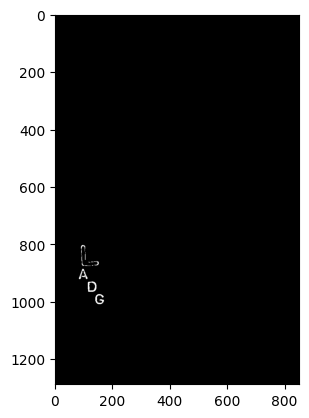

In [88]:
ret5,thresh5 = cv.threshold(d, 54, 255, cv.THRESH_TOZERO+cv.THRESH_OTSU)
plt.imshow(thresh5, cmap="gray")

In [5]:
train = pd.read_csv("/kaggle/input/rsna-bone-age/boneage-training-dataset.csv")
train

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False
...,...,...,...
12606,15605,50,False
12607,15606,113,False
12608,15608,55,False
12609,15609,150,True


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


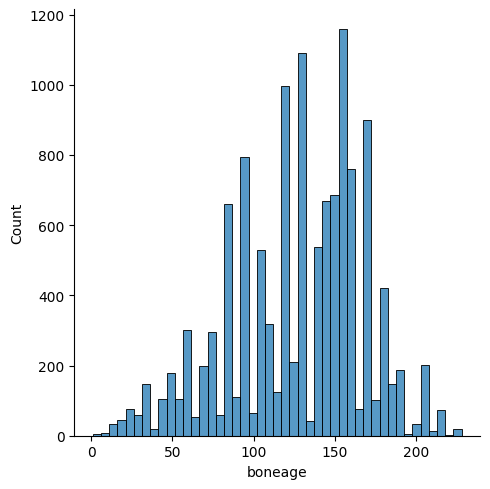

In [6]:
sns.displot(train, x="boneage")

In [7]:
train.replace(True,1,inplace=True)
train.replace(False,0,inplace=True)
train

/tmp/ipykernel_34/1327327106.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.replace(False,0,inplace=True)


,id,boneage,male
0,1377,180,0
1,1378,12,0
2,1379,94,0
3,1380,120,1
4,1381,82,0
...,...,...,...
12606,15605,50,0
12607,15606,113,0
12608,15608,55,0
12609,15609,150,1


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12611 entries, 0 to 12610
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       12611 non-null  int64  
 1   boneage  12611 non-null  int64  
 2   male     12611 non-null  float32
dtypes: float32(1), int64(2)
memory usage: 246.4 KB


In [12]:
train = train.astype({'male': 'float32'})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12611 entries, 0 to 12610
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       12611 non-null  int64  
 1   boneage  12611 non-null  int64  
 2   male     12611 non-null  float32
dtypes: float32(1), int64(2)
memory usage: 246.4 KB


In [13]:
train.describe()

,id,boneage,male
count,12611.000000,12611.000000,12611.000000
mean,8537.653001,127.320752,0.541829
std,4108.763993,41.182021,0.498267
min,1377.000000,1.000000,0.000000
25%,5074.500000,96.000000,0.000000
50%,8565.000000,132.000000,1.000000
75%,12091.500000,156.000000,1.000000
max,15610.000000,228.000000,1.000000


In [14]:
train.sort_values(by = ["id"],inplace=True)
train

,id,boneage,male
0,1377,180,0.0
1,1378,12,0.0
2,1379,94,0.0
3,1380,120,1.0
4,1381,82,0.0
...,...,...,...
12606,15605,50,0.0
12607,15606,113,0.0
12608,15608,55,0.0
12609,15609,150,1.0


In [15]:
base_bone_dir = os.path.join('..','input','rsna-bone-age')
base_bone_dir

'../input/rsna-bone-age'

In [16]:
!pwd

/kaggle/working


In [17]:
train['path'] = train['id'].map(lambda x: os.path.join(base_bone_dir,
                                                         'boneage-training-dataset',
                                                         'boneage-training-dataset',
                                                         '{}.png'.format(x)))
train['exists'] = train['path'].map(os.path.exists)
print(train['exists'].sum(), 'images found of', train.shape[0], 'total')
boneage_mean = train['boneage'].mean()
boneage_div = train['boneage'].std()
train['boneage_zscore'] = train['boneage'].map(lambda x: (x-boneage_mean)/boneage_div)
train.dropna(inplace = True)

train

12611 images found of 12611 total


,id,boneage,male,path,exists,boneage_zscore
0,1377,180,0.0,../input/rsna-bone-age/boneage-training-datase...,True,1.279181
1,1378,12,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-2.800269
2,1379,94,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-0.809109
3,1380,120,1.0,../input/rsna-bone-age/boneage-training-datase...,True,-0.177766
4,1381,82,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-1.100498
...,...,...,...,...,...,...
12606,15605,50,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-1.877537
12607,15606,113,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-0.347743
12608,15608,55,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-1.756124
12609,15609,150,1.0,../input/rsna-bone-age/boneage-training-datase...,True,0.550708


In [18]:
train['boneage_category'] = pd.cut(train['boneage'], 10)
new_train = train.groupby(['boneage_category', 'male']).apply(lambda x: x.sample(400, replace = True)
                                                      ).reset_index(drop = True)
print('New Data Size:', new_train.shape[0], 'Old Size:', train.shape[0])

New Data Size: 8000 Old Size: 12611


/tmp/ipykernel_34/3833298353.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_train = train.groupby(['boneage_category', 'male']).apply(lambda x: x.sample(400, replace = True)
/tmp/ipykernel_34/3833298353.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  new_train = train.groupby(['boneage_category', 'male']).apply(lambda x: x.sample(400, replace = True)


In [19]:
train

,id,boneage,male,path,exists,boneage_zscore,boneage_category
0,1377,180,0.0,../input/rsna-bone-age/boneage-training-datase...,True,1.279181,"(159.9, 182.6]"
1,1378,12,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-2.800269,"(0.773, 23.7]"
2,1379,94,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-0.809109,"(91.8, 114.5]"
3,1380,120,1.0,../input/rsna-bone-age/boneage-training-datase...,True,-0.177766,"(114.5, 137.2]"
4,1381,82,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-1.100498,"(69.1, 91.8]"
...,...,...,...,...,...,...,...
12606,15605,50,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-1.877537,"(46.4, 69.1]"
12607,15606,113,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-0.347743,"(91.8, 114.5]"
12608,15608,55,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-1.756124,"(46.4, 69.1]"
12609,15609,150,1.0,../input/rsna-bone-age/boneage-training-datase...,True,0.550708,"(137.2, 159.9]"


In [20]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(new_train,
                                   test_size = 0.25,
                                   random_state = 2018,
                                   stratify = new_train['boneage_category'])
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 6000 validation 2000


In [21]:
train_df

,id,boneage,male,path,exists,boneage_zscore,boneage_category
293,1473,12,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-2.800269,"(0.773, 23.7]"
4605,10042,132,1.0,../input/rsna-bone-age/boneage-training-datase...,True,0.113624,"(114.5, 137.2]"
1988,9859,69,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-1.416170,"(46.4, 69.1]"
713,3449,18,1.0,../input/rsna-bone-age/boneage-training-datase...,True,-2.654575,"(0.773, 23.7]"
5240,12291,150,1.0,../input/rsna-bone-age/boneage-training-datase...,True,0.550708,"(137.2, 159.9]"
...,...,...,...,...,...,...,...
7382,5124,216,0.0,../input/rsna-bone-age/boneage-training-datase...,True,2.153349,"(205.3, 228.0]"
534,2505,18,1.0,../input/rsna-bone-age/boneage-training-datase...,True,-2.654575,"(0.773, 23.7]"
4198,5567,120,0.0,../input/rsna-bone-age/boneage-training-datase...,True,-0.177766,"(114.5, 137.2]"
5347,8575,138,1.0,../input/rsna-bone-age/boneage-training-datase...,True,0.259318,"(137.2, 159.9]"


In [26]:
test = pd.read_csv("/kaggle/input/rsna-bone-age/boneage-test-dataset.csv")
test

,Case ID,Sex
0,4360,M
1,4361,M
2,4362,M
3,4363,M
4,4364,M
...,...,...
195,4555,F
196,4556,F
197,4557,F
198,4558,F


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Case ID  200 non-null    int64 
 1   Sex      200 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [28]:
test.replace("M",1,inplace=True)
test.replace("F",0,inplace=True)
test

/tmp/ipykernel_34/2340080399.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test.replace("F",0,inplace=True)


,Case ID,Sex
0,4360,1
1,4361,1
2,4362,1
3,4363,1
4,4364,1
...,...,...
195,4555,0
196,4556,0
197,4557,0
198,4558,0


In [29]:
test.sort_values(by = ["Case ID"],inplace=True)
test

,Case ID,Sex
0,4360,1
1,4361,1
2,4362,1
3,4363,1
4,4364,1
...,...,...
195,4555,0
196,4556,0
197,4557,0
198,4558,0


In [31]:
col_dic = {
            "Case ID":"id",
            "Sex":"male"
}

In [32]:
test.rename(columns=col_dic,inplace=True)
test

,id,male
0,4360,1
1,4361,1
2,4362,1
3,4363,1
4,4364,1
...,...,...
195,4555,0
196,4556,0
197,4557,0
198,4558,0


In [33]:
train_df.to_csv("/kaggle/working/train.csv",index=False)
valid_df.to_csv("/kaggle/working/valid.csv",index=False)
test.to_csv("/kaggle/working/test.csv",index=False)

# Creating Dataset & Transformer

In [90]:
import torch
from torch.utils.data import Dataset

In [92]:
train_df = pd.read_csv("/kaggle/working/train.csv")
test_df = pd.read_csv("/kaggle/working/valid.csv")

In [ ]:
train_df

In [ ]:
test_df

In [101]:
# from torchvision.models import Inception_V3_Weights, inception_v3

# weights = Inception_V3_Weights.DEFAULT

# transformer = weights.transforms()
# transformer

In [103]:
from torchvision.transforms import v2 
preprocess = v2.Compose([
    
#     v2.RandomRotation(20),
#     v2.RandomZoomOut(20),
    v2.RandomHorizontalFlip(0.5),
    v2.Resize(500),
    v2.CenterCrop(500),
    v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),    #ToTensor()
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
# v2.functional.grayscale_to_rgb
preprocess

Compose(
      RandomHorizontalFlip(p=0.5)
      Resize(size=[500], interpolation=InterpolationMode.BILINEAR, antialias=True)
      CenterCrop(size=(500, 500))
      Compose(
        ToImage()
        ToDtype(scale=True)
  )
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)

In [104]:
class rsnadataset(Dataset):

    def __init__(self,csv_dir,transform=None):

        super().__init__()
        self.csv=pd.read_csv(csv_dir)
        self.transform = transform

    def __len__(self):
        return len(self.csv)

    def __getitem__(self,x):

        img = Image.open(self.csv["path"][x])
        img = Image.merge("RGB", (img, img, img))
        sex = self.csv["male"][x]
        sex = torch.tensor(sex, dtype = torch.float32).unsqueeze(dim=0)
        label = self.csv["boneage"][x]
        label = torch.tensor(label, dtype = torch.float32).unsqueeze(dim=0)
        if self.transform:
            img = self.transform(img)
        
        return (img , sex) , label


train_dataset = rsnadataset("./train.csv",preprocess)
test_dataset = rsnadataset("./valid.csv",preprocess)


In [105]:
len(train_dataset)

6000

In [106]:
data , label = test_dataset[1050]
data[0]

Image([[[-1.8953, -1.8953, -1.9124,  ...,  2.2489,  2.2489,  2.2489],
        [-1.8953, -1.8953, -1.9124,  ...,  2.2489,  2.2489,  2.2489],
        [-1.8782, -1.8953, -1.8953,  ...,  2.2489,  2.2489,  2.2489],
        ...,
        [-1.8439, -1.8439, -1.8439,  ...,  0.4166,  1.2043,  1.8379],
        [-1.8439, -1.8439, -1.8439,  ...,  0.4166,  1.2043,  1.8379],
        [-1.8268, -1.8439, -1.8439,  ...,  0.4166,  1.2043,  1.8379]],

       [[-1.8081, -1.8081, -1.8256,  ...,  2.4286,  2.4286,  2.4286],
        [-1.8081, -1.8081, -1.8256,  ...,  2.4286,  2.4286,  2.4286],
        [-1.7906, -1.8081, -1.8081,  ...,  2.4286,  2.4286,  2.4286],
        ...,
        [-1.7556, -1.7556, -1.7556,  ...,  0.5553,  1.3606,  2.0084],
        [-1.7556, -1.7556, -1.7556,  ...,  0.5553,  1.3606,  2.0084],
        [-1.7381, -1.7556, -1.7556,  ...,  0.5553,  1.3606,  2.0084]],

       [[-1.5779, -1.5779, -1.5953,  ...,  2.6400,  2.6400,  2.6400],
        [-1.5779, -1.5779, -1.5953,  ...,  2.6400,  2.6400, 

In [107]:
label

tensor([82.])

In [108]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
next(iter(train_dataloader))

In [110]:
data ,label = next(iter(train_dataloader))
data[0].shape

torch.Size([32, 3, 500, 500])

# Model

In [111]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [41]:
from torchvision.models import Inception_V3_Weights, inception_v3

weights = Inception_V3_Weights.DEFAULT
model1 = inception_v3(weights=weights).to(device)
model1.aux_logits = False

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 143MB/s]  


In [42]:
model1.avgpool = nn.MaxPool2d(stride =2 , kernel_size=2)
model1.dropout = nn.Flatten()
model1.fc = nn.Identity()

In [43]:
summary(model=model1,
        input_size=(1, 3, 500, 500), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
Inception3 (Inception3)                  [1, 3, 500, 500]     [1, 100352]          3,326,696            True
├─BasicConv2d (Conv2d_1a_3x3)            [1, 3, 500, 500]     [1, 32, 249, 249]    --                   True
│    └─Conv2d (conv)                     [1, 3, 500, 500]     [1, 32, 249, 249]    864                  True
│    └─BatchNorm2d (bn)                  [1, 32, 249, 249]    [1, 32, 249, 249]    64                   True
├─BasicConv2d (Conv2d_2a_3x3)            [1, 32, 249, 249]    [1, 32, 247, 247]    --                   True
│    └─Conv2d (conv)                     [1, 32, 249, 249]    [1, 32, 247, 247]    9,216                True
│    └─BatchNorm2d (bn)                  [1, 32, 247, 247]    [1, 32, 247, 247]    64                   True
├─BasicConv2d (Conv2d_2b_3x3)            [1, 32, 247, 247]    [1, 64, 247, 247]    --                   True
│    └─Conv2d 

In [44]:
# for param in model1.parameters():
#     param.requires_grad = False

In [45]:
# for param in model1.Mixed_6b.parameters():
#   param.requires_grad = True

# for param in model1.Mixed_6c.parameters():
#   param.requires_grad = True

# for param in model1.Mixed_6d.parameters():
#   param.requires_grad = True

# for param in model1.Mixed_6e.parameters():
#   param.requires_grad = True

# for param in model1.Mixed_7a.parameters():
#     param.requires_grad = True

# for param in model1.Mixed_7b.parameters():
#     param.requires_grad = True

# for param in model1.Mixed_7c.parameters():
#     param.requires_grad = True

In [116]:
class Sexidentification(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(in_features=1, out_features=32)
                
            
            
            )
            
            


    def forward(self,s):
        s = self.fc_layers(s)
        return s



In [ ]:
model2 = Sexidentification().to(device)
model2

In [48]:
summary(model=model2,
        input_size=(300,1), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
Sexidentification (Sexidentification)    [300, 1]             [300, 32]            --                   True
├─Sequential (fc_layers)                 [300, 1]             [300, 32]            --                   True
│    └─Linear (0)                        [300, 1]             [300, 32]            64                   True
Total params: 64
Trainable params: 64
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.08
Params size (MB): 0.00
Estimated Total Size (MB): 0.08

In [117]:
class combomodel(nn.Module):
    def __init__(self, inception_model, sex_model):       #
        super().__init__()
        self.inception_model = inception_model
        self.sex_model = sex_model

        self.block_1 = nn.Sequential(
#             nn.Linear(in_features=2048, out_features=2048),
#             nn.ReLU(),
            nn.Linear(in_features=(100352+32), out_features=1000),
            nn.ReLU(),
            nn.Linear(in_features=1000, out_features=1000),
            nn.ReLU(),
            nn.Linear(in_features=1000, out_features=1)

             )
#         self.block_2= nn.Sequential()
                
            
                        
        
    def forward(self, x ,s):        
        x = self.inception_model(x)
#         x = x.logits
        s = self.sex_model(s)

        # print(x)
        # print(s)
        # print(type(x))
        # print(type(s))

        z = torch.cat((x,s), dim=1)
        z = self.block_1(z)

        return z




In [ ]:
model = combomodel(model1,model2).to(device)
model

In [50]:
summary(model=model,
        input_size= ((32,3,500,500),(32,1)), # ,(32,1)make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
combomodel (combomodel)                       [32, 3, 500, 500]    [32, 1]              --                   True
├─Inception3 (inception_model)                [32, 3, 500, 500]    [32, 100352]         3,326,696            True
│    └─BasicConv2d (Conv2d_1a_3x3)            [32, 3, 500, 500]    [32, 32, 249, 249]   --                   True
│    │    └─Conv2d (conv)                     [32, 3, 500, 500]    [32, 32, 249, 249]   864                  True
│    │    └─BatchNorm2d (bn)                  [32, 32, 249, 249]   [32, 32, 249, 249]   64                   True
│    └─BasicConv2d (Conv2d_2a_3x3)            [32, 32, 249, 249]   [32, 32, 247, 247]   --                   True
│    │    └─Conv2d (conv)                     [32, 32, 249, 249]   [32, 32, 247, 247]   9,216                True
│    │    └─BatchNorm2d (bn)                  [32, 32, 247, 247]   [32, 32, 247, 24

In [ ]:
# data ,label = next(iter(train_dataloader))
# img, sex, label = data[0].to(device), data[1].to(device), label.to(device)
# model.eval()
# with torch.inference_mode():
#     ypred = model(img,sex)

# ypred

In [ ]:
# label

In [53]:
# loss_fn = nn.MSELoss().to(device)
# optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.1)

In [54]:
# model.train()

# ypred = model(img,sex)

# loss = loss_fn(ypred, label)
# a = mae(ypred, label)
# print(loss)
# optimizer.zero_grad()

# loss.backward()

# optimizer.step()



# model.eval()
# with torch.inference_mode():
#     ypred = model(img,sex)

# ypred

# Train the Model

In [ ]:
# !pip install torchmetrics

# from torchmetrics.regression import MeanAbsoluteError

# mae = MeanAbsoluteError().to(device)

In [56]:
!pip install wandb -qU
import wandb
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [77]:
# wandb.init(settings=wandb.Settings(start_method="fork"))
wandb.init(
        project="RSNA final3 (500)",
        config={
            "epochs": 100,
            "batch_size": 32,
            "lr": 0.001
            })

/test/test_acc(z_score),█▅▇▆▆▄▅▃▃▃▃▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁
/test/test_loss,█▅▇▆▆▄▅▃▃▃▃▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁
/train/train_acc(z_score),█▃▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
/train/train_loss,█▃▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
/test/test_acc(z_score),10.02208
/test/test_loss,10.02208
/train/train_acc(z_score),8.66754
/train/train_loss,8.66754


In [78]:
config = wandb.config

In [81]:
loss_fn = nn.L1Loss().to(device)

optimizer = torch.optim.Adam(params=model.parameters(), lr = config.lr)

In [84]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [85]:
# Import tqdm for progress bar
from tqdm.auto import tqdm


# epochs = 100

# Create training and testing loop
for epoch in tqdm(range(config.epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    train_acc = 0
    
    # Add a loop to loop through training batches
    for batch, (data, label) in enumerate(tqdm(train_dataloader)):
        model.train()
        
        # 1. Forward pass
        img, sex, label = data[0].to(device), data[1].to(device), label.to(device)

        train_pred = model(img, sex)

        # 2. Calculate loss (per batch)
        loss = loss_fn(train_pred, label)

#         train_acc += mae(train_pred, label)

        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
#     train_acc /= len(train_dataloader)

    wandb.log({
        "/train/train_loss" : train_loss.cpu()
#         "/train/train_acc(z_score)" : train_acc.cpu()
    })

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    
    model.eval()
    with torch.inference_mode():
        for data, label in test_dataloader:

            img, sex, label = data[0].to(device), data[1].to(device), label.to(device)

            # 1. Forward pass
            test_pred = model(img,sex)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, label) # accumulatively add up the loss per epoch

#             test_acc += mae(test_pred, label)

        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
#         test_acc /= len(test_dataloader)

    wandb.log({
        "/test/test_loss" : test_loss.cpu()
#         "/test/test_acc(z_score)" : test_acc.cpu()
    })

    ## Print out what's happening
#     print(f"\nTrain loss: {train_loss:.5f} , train acc(z): {train_acc:.2f}, train acc(m) {(((train_acc.cpu().item())*boneage_div)+boneage_mean):.2f}|\n Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}, train acc(m) {(((test_acc.cpu().item())*boneage_div)+boneage_mean):.2f}\n")
    print(f"\nTrain loss(MAE): {train_loss:.5f} |\n Test loss(MAE): {test_loss:.5f}\n")
    
    #saving the model
    if epoch % 5 == 0:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
            }, f"./model_30_auto_500_e{epoch}.pth")
        
wandb.finish()


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 7.49704 |
 Test loss(MAE): 9.20366

Epoch: 1
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 6.70316 |
 Test loss(MAE): 7.68559

Epoch: 2
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 6.31964 |
 Test loss(MAE): 8.74190

Epoch: 3
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 6.00108 |
 Test loss(MAE): 7.49049

Epoch: 4
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 5.69538 |
 Test loss(MAE): 7.21022

Epoch: 5
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 5.59097 |
 Test loss(MAE): 7.78701

Epoch: 6
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 5.32486 |
 Test loss(MAE): 7.04728

Epoch: 7
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 5.01925 |
 Test loss(MAE): 7.45632

Epoch: 8
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 5.04732 |
 Test loss(MAE): 7.25223

Epoch: 9
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 4.92479 |
 Test loss(MAE): 6.85812

Epoch: 10
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 4.87399 |
 Test loss(MAE): 6.90117

Epoch: 11
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 4.56209 |
 Test loss(MAE): 7.16511

Epoch: 12
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 4.51669 |
 Test loss(MAE): 7.61608

Epoch: 13
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 4.27468 |
 Test loss(MAE): 7.02438

Epoch: 14
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 4.60529 |
 Test loss(MAE): 6.68585

Epoch: 15
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 4.34358 |
 Test loss(MAE): 6.76632

Epoch: 16
-------


  0%|          | 0/375 [00:00<?, ?it/s]


Train loss(MAE): 4.16168 |
 Test loss(MAE): 7.06668

Epoch: 17
-------


  0%|          | 0/375 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Model_V2(Try to increase model_V1 accuracy even more ...)

In [118]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [119]:
#Create a copy of first model

from torchvision.models import Inception_V3_Weights, inception_v3

model1_v2 = inception_v3().to(device)
model1_v2.aux_logits = False
model1_v2.avgpool = nn.MaxPool2d(stride =2 , kernel_size=2)
model1_v2.dropout = nn.Flatten()
model1_v2.fc = nn.Identity()

model2_v2 = Sexidentification().to(device)

model_v2 = combomodel(model1_v2,model2_v2).to(device)

model_v2

combomodel(
  (inception_model): Inception3(
    (Conv2d_1a_3x3): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_2a_3x3): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_2b_3x3): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (Conv2d_3b_1x1): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_4a_3x

In [120]:
#Loading the weights

checkpoint = torch.load("../input/weigt-and-bias/model_30_auto_500_e15.pth")
model_v2.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [94]:
# # loss_fn = nn.L1Loss().to(device)
# train_loss = 0
# test_loss = 0 

# model_v2.eval()
# with torch.inference_mode():
#     for data, label in train_dataloader:

#         img, sex, label = data[0].to(device), data[1].to(device), label.to(device)

#         # 1. Forward pass
#         train_pred = model_v2(img,sex)

#         # 2. Calculate loss (accumatively)
#         train_loss += loss_fn(train_pred, label) # accumulatively add up the loss per epoch

# #         test_acc += mae(test_pred, label)

#         # 3. Calculate accuracy (preds need to be same as y_true)
#         # test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

#     # Calculations on test metrics need to happen inside torch.inference_mode()
#     # Divide total test loss by length of test dataloader (per batch)
#     train_loss /= len(train_dataloader)

#     # Divide total accuracy by length of test dataloader (per batch)
# #     test_acc /= len(test_dataloader)

# print(train_loss)

# model_v2.eval()
# with torch.inference_mode():
#     for data, label in test_dataloader:

#         img, sex, label = data[0].to(device), data[1].to(device), label.to(device)

#         # 1. Forward pass
#         test_pred = model_v2(img,sex)

#         # 2. Calculate loss (accumatively)
#         test_loss += loss_fn(test_pred, label) # accumulatively add up the loss per epoch

# #         test_acc += mae(test_pred, label)

#         # 3. Calculate accuracy (preds need to be same as y_true)
#         # test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

#     # Calculations on test metrics need to happen inside torch.inference_mode()
#     # Divide total test loss by length of test dataloader (per batch)
#     test_loss /= len(test_dataloader)

#     # Divide total accuracy by length of test dataloader (per batch)
# #     test_acc /= len(test_dataloader)

# print(test_loss)



tensor(16.1427, device='cuda:0')
tensor(18.1600, device='cuda:0')


In [121]:
!pip install wandb -qU
import wandb
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [138]:
wandb.init(
        project="RSNA final4 (500)",
        config={
            "epochs": 100,
            "batch_size": 32,
            "lr": 0.01
            })

/train/train_loss,▁
/train/train_loss,15.51965


In [139]:
config = wandb.config

In [144]:
loss_fn = nn.L1Loss().to(device)

# mae = nn.L1Loss().to(device)

optimizer = torch.optim.Adam(params=model_v2.parameters(), lr = config.lr)
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',patience=5 ,factor=0.5,verbose=True)

In [1]:
# scheduler.get_last_lr()

In [ ]:
model_v2.to(device)

In [146]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [148]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# epochs = 100

# Create training and testing loop
for epoch in tqdm(range(config.epochs)):
    print(f"Epoch: {epoch}\n-------")
    
    ### Training
    train_loss = 0
    train_acc = 0
    
    # loop through training batches
    for batch, (data, label) in enumerate(tqdm(train_dataloader)):
        model_v2.train()
        
        # 1. Forward pass
        img, sex, label = data[0].to(device), data[1].to(device), label.to(device)

        train_pred = model_v2(img, sex)

        # 2. Calculate loss (per batch)
        loss = loss_fn(train_pred, label)

        #train_acc += mae(train_pred, label)

        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    
    train_loss /= len(train_dataloader)
#     train_acc /= len(train_dataloader)

    wandb.log({
        "/train/train_loss" : train_loss.cpu()
#         "lr" : scheduler.get_last_lr()
#         "/train/train_acc(z_score)" : train_acc.cpu()
    })
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_v2.eval()
    with torch.inference_mode():
        for data, label in test_dataloader:

            img, sex, label = data[0].to(device), data[1].to(device), label.to(device)

            # 1. Forward pass
            test_pred = model_v2(img,sex)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, label) # accumulatively add up the loss per epoch

#             test_acc += mae(test_pred, label)

        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
#         test_acc /= len(test_dataloader)

    scheduler.step(test_loss)
    wandb.log({
        "/test/test_loss" : test_loss.cpu()
#         "/test/lr" : scheduler.get_last_lr()
#         "/test/test_acc(z_score)" : test_acc.cpu()
    })

    ## Print out what's happening
#     print(f"\nTrain loss: {train_loss:.5f} , train acc(z): {train_acc:.2f}, train acc(m) {(((train_acc.cpu().item())*boneage_div)+boneage_mean):.2f}|\n Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}, train acc(m) {(((test_acc.cpu().item())*boneage_div)+boneage_mean):.2f}\n")
    print(f"\nTrain loss(MAE): {train_loss:.5f} |\n Test loss(MAE): {test_loss:.5f}\n")
    
    #saving the Model
    if epoch % 5 == 0:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model_v2.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
            }, f"./model_v2_30_automate_500_e{epoch}.pth")
        
    
        
wandb.finish()


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 9.03659 |
 Test loss(MAE): 9.25735

Epoch: 1
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 8.74311 |
 Test loss(MAE): 8.19616

Epoch: 2
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 8.24719 |
 Test loss(MAE): 8.32757

Epoch: 3
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 8.13266 |
 Test loss(MAE): 7.84683

Epoch: 4
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 7.74376 |
 Test loss(MAE): 7.63791

Epoch: 5
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 7.57636 |
 Test loss(MAE): 7.70670

Epoch: 6
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 7.54766 |
 Test loss(MAE): 8.54080

Epoch: 7
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 7.30552 |
 Test loss(MAE): 7.51789

Epoch: 8
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 7.02200 |
 Test loss(MAE): 7.13039

Epoch: 9
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 6.96464 |
 Test loss(MAE): 7.35495

Epoch: 10
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 6.73844 |
 Test loss(MAE): 7.20042

Epoch: 11
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 6.47445 |
 Test loss(MAE): 7.36489

Epoch: 12
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 6.39372 |
 Test loss(MAE): 7.31430

Epoch: 13
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 6.18920 |
 Test loss(MAE): 6.69141

Epoch: 14
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 5.99766 |
 Test loss(MAE): 7.37453

Epoch: 15
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 5.95890 |
 Test loss(MAE): 7.29364

Epoch: 16
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 5.83245 |
 Test loss(MAE): 7.02072

Epoch: 17
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 5.71849 |
 Test loss(MAE): 6.71409

Epoch: 18
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 5.72028 |
 Test loss(MAE): 6.82344

Epoch: 19
-------


  0%|          | 0/188 [00:00<?, ?it/s]

Epoch 00021: reducing learning rate of group 0 to 5.0000e-04.

Train loss(MAE): 5.39745 |
 Test loss(MAE): 7.31157

Epoch: 20
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 4.91108 |
 Test loss(MAE): 6.12954

Epoch: 21
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 4.81145 |
 Test loss(MAE): 5.98737

Epoch: 22
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 4.48068 |
 Test loss(MAE): 5.94865

Epoch: 23
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 4.45513 |
 Test loss(MAE): 6.01352

Epoch: 24
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 4.33233 |
 Test loss(MAE): 5.90831

Epoch: 25
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 4.22927 |
 Test loss(MAE): 6.03082

Epoch: 26
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 4.11860 |
 Test loss(MAE): 5.95667

Epoch: 27
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 4.19717 |
 Test loss(MAE): 5.96137

Epoch: 28
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 4.09005 |
 Test loss(MAE): 5.76428

Epoch: 29
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 4.02722 |
 Test loss(MAE): 5.73549

Epoch: 30
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 3.90107 |
 Test loss(MAE): 5.69550

Epoch: 31
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 3.93948 |
 Test loss(MAE): 5.86305

Epoch: 32
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 3.78136 |
 Test loss(MAE): 5.70709

Epoch: 33
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 3.71920 |
 Test loss(MAE): 5.67194

Epoch: 34
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 3.79286 |
 Test loss(MAE): 5.54635

Epoch: 35
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 3.65800 |
 Test loss(MAE): 5.66583

Epoch: 36
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 3.56267 |
 Test loss(MAE): 5.59526

Epoch: 37
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 3.47020 |
 Test loss(MAE): 5.73341

Epoch: 38
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 3.43710 |
 Test loss(MAE): 5.93597

Epoch: 39
-------


  0%|          | 0/188 [00:00<?, ?it/s]


Train loss(MAE): 3.32468 |
 Test loss(MAE): 5.70421

Epoch: 40
-------


  0%|          | 0/188 [00:00<?, ?it/s]

Epoch 00042: reducing learning rate of group 0 to 2.5000e-04.

Train loss(MAE): 3.37929 |
 Test loss(MAE): 5.71927

Epoch: 41
-------


  0%|          | 0/188 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [154]:
train_loss = 0

model_v2.eval()
with torch.inference_mode():
    for data, label in train_dataloader:

        img, sex, label = data[0].to(device), data[1].to(device), label.to(device)

        # 1. Forward pass
        train_pred = model_v2(img,sex)

        # 2. Calculate loss (accumatively)
        train_loss += loss_fn(train_pred, label) # accumulatively add up the loss per epoch

#         test_acc += mae(test_pred, label)

    # Calculations on test metrics need to happen inside torch.inference_mode()
    # Divide total test loss by length of test dataloader (per batch)
    train_loss /= len(train_dataloader)

    # Divide total accuracy by length of test dataloader (per batch)
#     train_acc /= len(train_dataloader)

print(test_loss)

tensor(5.6937, device='cuda:0')


In [155]:
test_loss = 0

model_v2.eval()
with torch.inference_mode():
    for data, label in test_dataloader:

        img, sex, label = data[0].to(device), data[1].to(device), label.to(device)

        # 1. Forward pass
        test_pred = model_v2(img,sex)

        # 2. Calculate loss (accumatively)
        test_loss += loss_fn(test_pred, label) # accumulatively add up the loss per epoch

#         test_acc += mae(test_pred, label)

    # Divide total test loss by length of test dataloader (per batch)
    test_loss /= len(test_dataloader)

    # Divide total accuracy by length of test dataloader (per batch)
#     test_acc /= len(test_dataloader)

print(test_loss)

tensor(5.5949, device='cuda:0')


# Evaluation on Test Data(200 data) 

In [156]:
test_final = pd.read_csv("/kaggle/working/test.csv")
test_final

,id,male
0,4360,1
1,4361,1
2,4362,1
3,4363,1
4,4364,1
...,...,...
195,4555,0
196,4556,0
197,4557,0
198,4558,0


In [157]:
base_bone_dir = os.path.join('..','input','rsna-bone-age')
base_bone_dir

'../input/rsna-bone-age'

In [158]:
test_final['path'] = test_final['id'].map(lambda x: os.path.join(base_bone_dir,
                                                         'boneage-test-dataset',
                                                         'boneage-test-dataset',
                                                         '{}.png'.format(x)))
test_final['exists'] = test_final['path'].map(os.path.exists)
print(test_final['exists'].sum(), 'images found of', test_final.shape[0], 'total')


test_final

200 images found of 200 total


,id,male,path,exists
0,4360,1,../input/rsna-bone-age/boneage-test-dataset/bo...,True
1,4361,1,../input/rsna-bone-age/boneage-test-dataset/bo...,True
2,4362,1,../input/rsna-bone-age/boneage-test-dataset/bo...,True
3,4363,1,../input/rsna-bone-age/boneage-test-dataset/bo...,True
4,4364,1,../input/rsna-bone-age/boneage-test-dataset/bo...,True
...,...,...,...,...
195,4555,0,../input/rsna-bone-age/boneage-test-dataset/bo...,True
196,4556,0,../input/rsna-bone-age/boneage-test-dataset/bo...,True
197,4557,0,../input/rsna-bone-age/boneage-test-dataset/bo...,True
198,4558,0,../input/rsna-bone-age/boneage-test-dataset/bo...,True


In [163]:
from torchvision.transforms import v2 
preprocess2 = v2.Compose([
    
#     v2.RandomRotation(20),
#     v2.RandomZoomOut(20),
#     v2.RandomHorizontalFlip(0.5),
    v2.Resize(500),
    v2.CenterCrop(500),
    v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),    #ToTensor()
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
# v2.functional.grayscale_to_rgb
preprocess2

Compose(
      Resize(size=[500], interpolation=InterpolationMode.BILINEAR, antialias=True)
      CenterCrop(size=(500, 500))
      Compose(
        ToImage()
        ToDtype(scale=True)
  )
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)

In [173]:
test_final.to_csv("/kaggle/working/test_final.csv",index=False)

In [176]:
class rsna_finaltest_dataset(Dataset):

    def __init__(self,csv_dir,transform=None):

        super().__init__()
        self.csv=pd.read_csv(csv_dir)
        self.transform = transform

    def __len__(self):
        return len(self.csv)

    def __getitem__(self,x):

        img = Image.open(self.csv["path"][x])
        img = Image.merge("RGB", (img, img, img))
        sex = self.csv["male"][x]
        sex = torch.tensor(sex, dtype = torch.float32).unsqueeze(dim=0)
#         label = self.csv["boneage"][x]
#         label = torch.tensor(label, dtype = torch.float32).unsqueeze(dim=0)
        if self.transform:
            img = self.transform(img)
        
        return img , sex
    
    
test_final_dataset = rsna_finaltest_dataset("/kaggle/working/test_final.csv",transform=preprocess2)

In [222]:
test_final_dataset[0]

(Image([[[-1.5014, -1.1589, -1.3130,  ..., -1.2274, -0.9192, -0.1828],
         [-1.4843, -1.1589, -1.2959,  ..., -1.2274, -0.9363, -0.1828],
         [-1.4843, -1.1589, -1.2959,  ..., -1.2445, -0.9363, -0.1828],
         ...,
         [-1.0904, -0.8849, -1.2274,  ..., -1.3473, -1.2103, -0.9877],
         [-1.0904, -0.8849, -1.2274,  ..., -1.3473, -1.2103, -0.9877],
         [-1.0904, -0.8849, -1.2274,  ..., -1.3302, -1.2103, -0.9877]],
 
        [[-1.4055, -1.0553, -1.2129,  ..., -1.1253, -0.8102, -0.0574],
         [-1.3880, -1.0553, -1.1954,  ..., -1.1253, -0.8277, -0.0574],
         [-1.3880, -1.0553, -1.1954,  ..., -1.1429, -0.8277, -0.0574],
         ...,
         [-0.9853, -0.7752, -1.1253,  ..., -1.2479, -1.1078, -0.8803],
         [-0.9853, -0.7752, -1.1253,  ..., -1.2479, -1.1078, -0.8803],
         [-0.9853, -0.7752, -1.1253,  ..., -1.2304, -1.1078, -0.8803]],
 
        [[-1.1770, -0.8284, -0.9853,  ..., -0.8981, -0.5844,  0.1651],
         [-1.1596, -0.8284, -0.9678,  ..., 

In [195]:
test_final_dataloader = DataLoader(test_final_dataset, batch_size=32, shuffle=False)

In [219]:
# img,sex = next(iter(test_final_dataloader))
# sex[0]

In [200]:
results=[]
model_v2.eval()
with torch.inference_mode():
    for batch, (img ,sex) in enumerate(test_final_dataloader):
        img, sex = img.to(device), sex.to(device)
        result = model_v2(img, sex)
        results.append(result.cpu())

In [215]:
results_np = torch.cat(results,0).squeeze().round().numpy()
results_np

array([171., 177.,  70., 155., 137.,  47., 142., 142., 179., 192., 161.,
       107., 158., 188., 166., 141., 190., 144., 128., 171., 162.,  72.,
       127., 158., 162.,  92.,  29.,  96.,  33.,  17., 167., 124., 149.,
        60., 109., 145.,  73., 185., 152., 171., 154., 146.,  70., 165.,
       177., 187., 167., 131., 102., 153., 158., 159., 138., 182., 155.,
       130., 153., 186., 177., 173., 146., 148., 159., 126., 122., 206.,
       156., 183., 138., 121., 145., 152., 132., 218., 106.,  84., 187.,
        92., 153., 173., 130., 181., 175.,  55., 205., 202., 135., 177.,
       116., 155., 160., 134., 174., 125., 139.,  27., 166., 140., 116.,
       104., 124., 149., 125., 103.,  74., 112., 158.,  67.,  53.,  84.,
       186., 132.,  84., 173., 149., 164., 149., 111., 101.,  52., 136.,
       171., 112.,  34., 125., 135., 115., 113., 164., 193.,  60., 135.,
       111., 181., 118., 110., 144., 157.,  99.,  86.,  88., 120., 189.,
       129.,  85.,  17., 161., 110., 184.,  47.,  5

In [216]:
result_df = pd.DataFrame({  "Id" : test_final["id"] ,
                             "Bone age" : results_np})
result_df

,Id,Bone age
0,4360,171.0
1,4361,177.0
2,4362,70.0
3,4363,155.0
4,4364,137.0
...,...,...
195,4555,131.0
196,4556,127.0
197,4557,171.0
198,4558,147.0


In [217]:
result_df.to_csv("./results.csv",index=False)